In [1]:
# Graphics
%matplotlib inline
import matplotlib.pyplot as plt
import contextily
# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
import numpy as np
import contextily as ctx
import mapclassify

import folium

In [2]:
# Reading data from the shapefile 
merida20 = gpd.read_file("merida_kanasing_ageb_censo_data/merida_kanasing_ageb_censo_data.shp")
merida20 = merida20[['CVEGEO', 'POBTOT', 'geometry']]
merida20.rename(columns={'POBTOT':'POBTOT2020'},
               inplace=True)
# Reprojecting to projected coordinate system
merida20 = merida20.to_crs(epsg=4485)
merida20.head()

,CVEGEO,POBTOT2020,geometry
0,3105000010027,21,"POLYGON ((2754849.653 2488201.053, 2754860.000..."
1,3105000010031,253,"POLYGON ((2771776.890 2478590.322, 2771690.909..."
2,3105000010120,1444,"POLYGON ((2764143.656 2479289.504, 2764145.335..."
3,3105000010154,186,"POLYGON ((2752865.731 2469623.554, 2752868.219..."
4,3105000010169,1580,"POLYGON ((2761880.766 2478332.690, 2761889.991..."


In [3]:
# Reading data from the shapefile 
merida10 = gpd.read_file("merida_kanasin_2010/merida_kanasin2010.shp")
merida10 = merida10[['CVEGEO', 'pobtot']]
merida10.rename(columns={'pobtot':'POBTOT2010'},
               inplace=True)
merida10.head()

,CVEGEO,POBTOT2010
0,3105000010120,1642.0
1,3105000010169,1618.0
2,3105000010188,1709.0
3,310500001021A,1666.0
4,3105000010224,926.0


In [4]:
merida2010_20 = merida20.merge(merida10, on=['CVEGEO'], how='outer')
merida2010_20 = merida2010_20.dropna()

In [5]:
merida2010_20.isnull().sum()

CVEGEO        0
POBTOT2020    0
geometry      0
POBTOT2010    0
dtype: int64

In [6]:
merida2010_20 = merida2010_20[['CVEGEO', 'POBTOT2010','POBTOT2020', 'geometry']]
merida2010_20

,CVEGEO,POBTOT2010,POBTOT2020,geometry
2,3105000010120,1642.0,1444.0,"POLYGON ((2764143.656 2479289.504, 2764145.335..."
4,3105000010169,1618.0,1580.0,"POLYGON ((2761880.766 2478332.690, 2761889.991..."
5,3105000010188,1709.0,1538.0,"POLYGON ((2764110.007 2478349.070, 2764166.774..."
6,310500001021A,1666.0,1571.0,"POLYGON ((2760966.319 2476809.061, 2760907.648..."
7,3105000010224,926.0,694.0,"POLYGON ((2761747.489 2477244.065, 2761744.829..."
...,...,...,...,...
574,3104100010691,23.0,1732.0,"POLYGON ((2770200.455 2473965.565, 2770202.797..."
575,3104100010704,1034.0,1520.0,"POLYGON ((2768075.802 2472356.969, 2768014.796..."
576,3104100010719,760.0,1435.0,"POLYGON ((2768075.802 2472356.969, 2768066.995..."
577,3104100010723,1294.0,1712.0,"POLYGON ((2767741.353 2470134.192, 2767732.553..."


In [7]:
rnk = merida2010_20.rank(ascending=False) # ascending ranks 1=high, n=lowest
rnk['CVEGEO'] = merida2010_20['CVEGEO']
delta_rnk = rnk.POBTOT2010 - rnk.POBTOT2020
delta_rnk

2      -94.0
4      -55.0
5      -79.0
6      -66.5
7      -61.0
       ...  
574    208.0
575     24.0
576     37.0
577     29.0
578    201.0
Length: 519, dtype: float64

In [10]:
cls = np.digitize(delta_rnk, [-100, -50, 0, 50, 100, 150, 200])
cls

array([1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 6, 3, 2, 1, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 3, 2,
       3, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 4, 3, 5, 4, 4, 1, 2, 3, 2, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 6, 3, 2, 2, 3, 2, 4, 2,
       4, 3, 2, 5, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 3, 2, 3, 4, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3,
       2, 2, 4, 1, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 6, 2, 3, 2, 2, 1, 1, 2,
       1, 3, 2, 3, 4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 1,

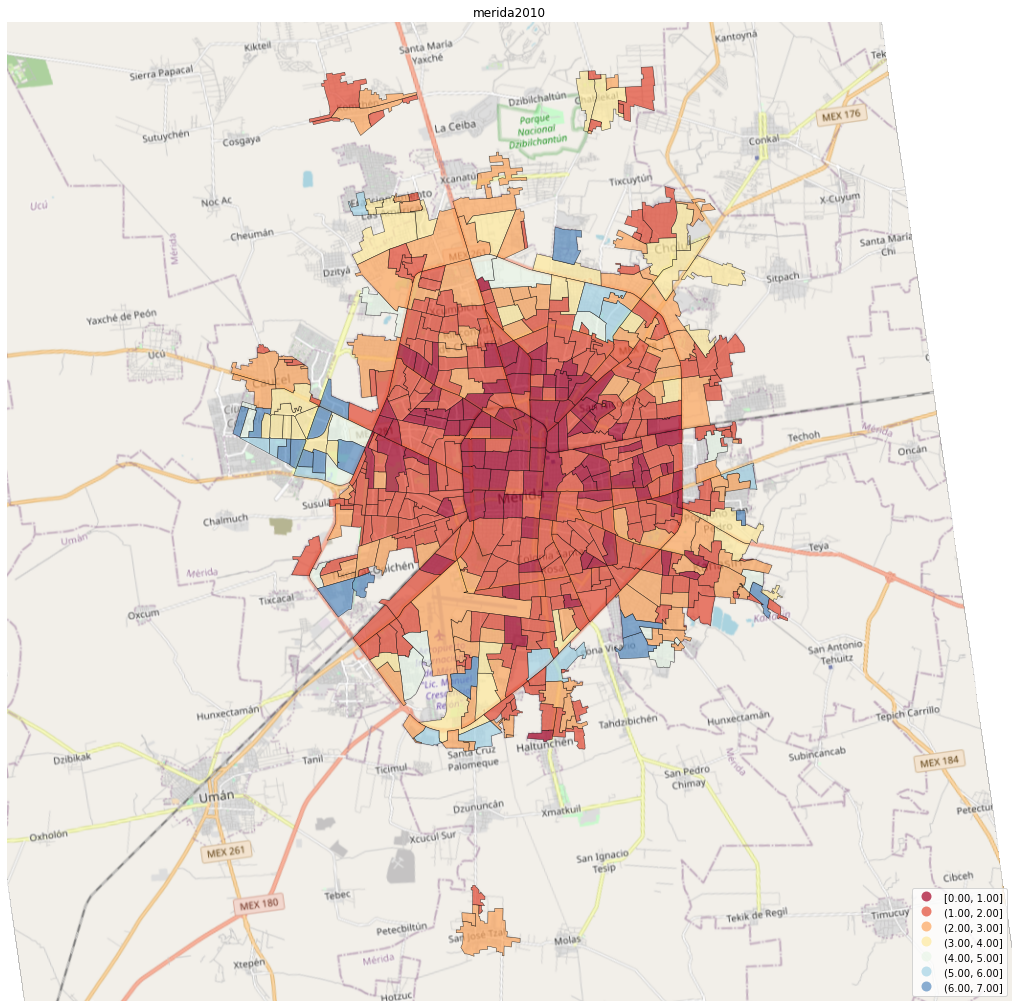

In [12]:
f, ax = plt.subplots(1, figsize=(18, 18))
merida2010_20.assign(cl=cls).plot(ax=ax, column='cl', categorical=True, cmap='RdYlBu', 
                                  legend = True, legend_kwds={"loc": 4},edgecolor='black',
                                  linewidth=0.5, alpha=0.7,
           scheme='equal_interval', k=7)
ax.set_axis_off()
ax.set_title('merida2010')
plt.axis('equal')
contextily.add_basemap(ax, 
                        crs=merida2010_20.crs,
                       url=ctx.tile_providers.OSM_A
                      )
#ax.set_title('Density population in Merida & Kanasin 2010')

plt.savefig('prueba.jpg')